In [1]:
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
from numpy import pi as pi

#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

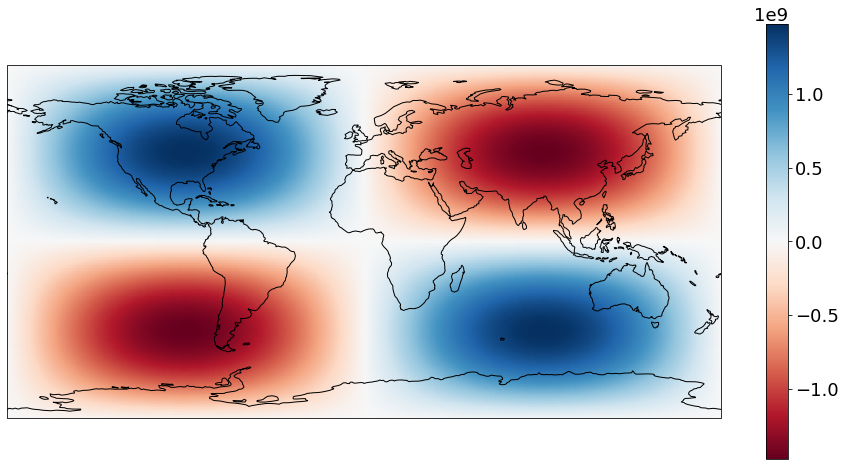

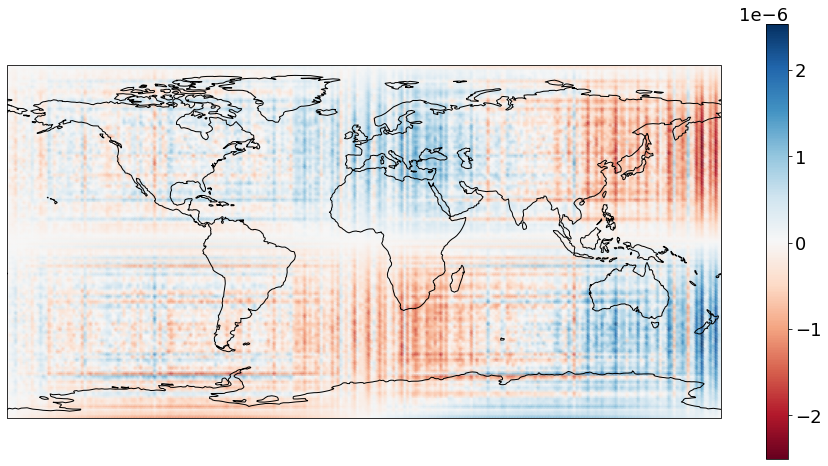

In [2]:
def psi_calc(om,L = 2):
    psi = pysh.SHGrid.from_zeros(lmax=L,grid='GLQ')
    ilat = 0
    for lat in psi.lats():
        ilon = 0
        for lon in psi.lons():
            psi.data[ilat,ilon] = SL.centrifugal_perturbation_value(om,lat,lon)
            ilon += 1
        ilat += 1
    return psi


L = 128
om = np.zeros(2)
om[1] = 1
psi = psi_calc(om,L)
SL.plot(psi)

psi_lm = pysh.SHCoeffs.from_zeros(lmax=L,normalization = 'ortho')
psi_lm.coeffs[:,2,:3] = SL.centrifugal_perturbation_coefficients(om)
psi2 = psi_lm.expand(grid='GLQ')
SL.plot(psi-psi2)
